In [ ]:
# 데이터 로드
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head(3)

df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# EDA (Exploratory Data Analysis) -> 데이터 탐험 (데이터의 유무 확인)
print(df_train.columns) # train
print(df_test.columns) # test



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)

(891, 12)
(418, 11)


(418, 11)

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
# null 갯수 체크
print(df_train.isna().sum())
print(df_test.isna().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 어떤 컬럼을 살리고, 어떤 컬럼을 지울 것인가? => 시각화를 통해 진행
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart(column_name):
    # df_train[df_train["Survived"] == 1]
    # df_train[df_train["Survived"] == 1]["Pclass"] # Pclass 컬럼의 데이터 출력

    survived = df_train[df_train["Survived"] == 1][column_name].value_counts()
    dead = df_train[df_train["Survived"] == 0][column_name].value_counts()

    df_merged = pd.DataFrame({"Survived":survived, "Dead": dead})
    df_merged.plot(kind="bar", stacked=True, figsize=(12,8))

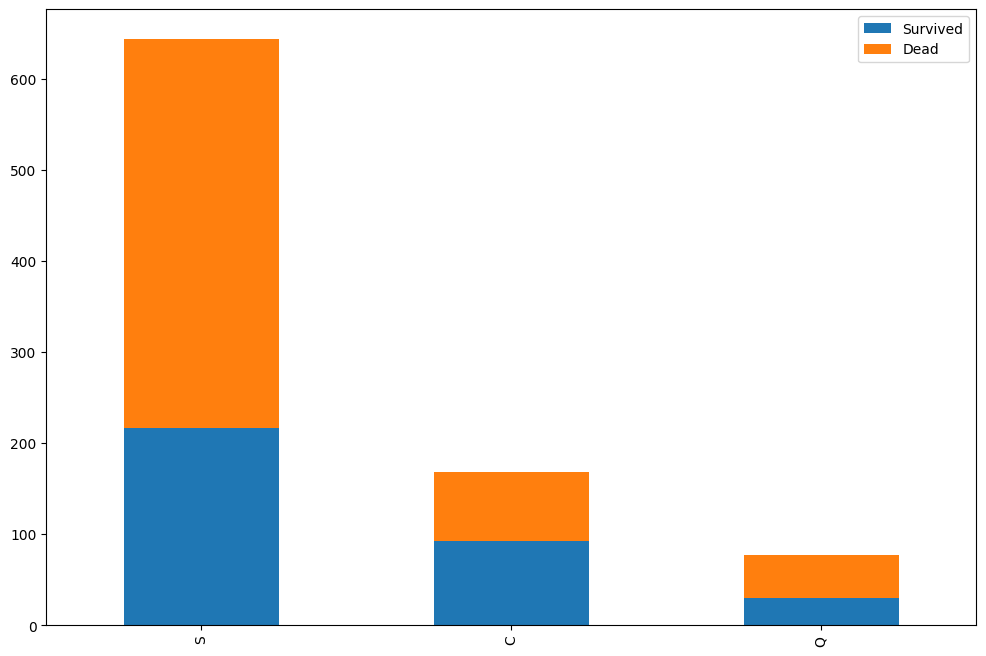

In [ ]:
bar_chart("Embarked")

In [ ]:
# 가장 많은 요금을 낸 상위 10명의 생존율은 어떻게 될까요?
# df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]] # Fare : 요금에 따라서 정렬
# head(5) 상위 5명 || tail(5) 하위 5명
# df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]].value_counts() # 인원 카운트
df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived"]].value_counts() # 인원 카운트

Survived
1           7
0           3
dtype: int64

In [ ]:
df_train[["Name","Survived"]]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


In [ ]:
# 이름으로 값들 추려서 확인
train_test_data = [df_train, df_test]

for data in train_test_data:
  data["Name"] = data["Name"].str.extract(" ([A-Za-z]+)\. ") # extract 추출하기

In [ ]:
df_train["Name"]
# df_train["Name"].value_counts()

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
# 문자열 -> 숫자형 데이터로 변경
name_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5
}

for data in train_test_data:
  data["Name"] = data["Name"].map(name_mapping)

In [ ]:
df_train["Name"].value_counts()

0.0    517
1.0    182
2.0    125
3.0     40
4.0      7
5.0      6
Name: Name, dtype: int64

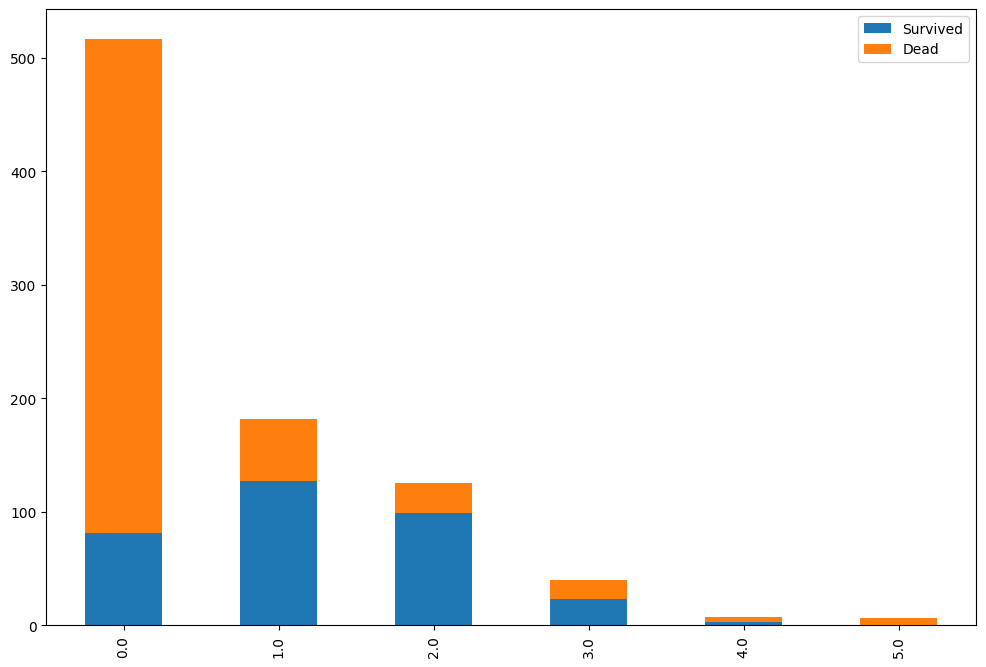

In [ ]:
bar_chart("Name")

In [ ]:
# Sex
df_train["Sex"] = df_train["Sex"].replace({"male":0, "female":1})
df_test["Sex"] = df_test["Sex"].replace({"male":0, "female":1})

In [ ]:
df_train["Sex"].value_counts()
df_test["Sex"].value_counts()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,2.0,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1.0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,2.0,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.0,0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,5.0,0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,1.0,1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,1.0,1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,0.0,0,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Age
df_train["Age"].isna().sum()


177

In [ ]:
df_train.groupby("Name")["Age"].mean()


Name
0.0    32.368090
1.0    21.773973
2.0    35.898148
3.0     4.574167
4.0    42.000000
5.0    43.166667
Name: Age, dtype: float64

In [ ]:
df_train["Age"].fillna(df_train.groupby("Name")["Age"].transform("mean"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Name")["Age"].transform("mean"), inplace=True)

In [ ]:
df_train["Age"].isna().sum()

0

In [ ]:
df_test["Age"].isna().sum()


1

In [ ]:
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True) # Nan인 부분을 변경
df_test["Age"].isna().sum() # null 데이터 갯수 확인



0

In [ ]:
# Age

df_train["Age"].value_counts()

32.368090    119
21.773973     36
24.000000     30
22.000000     27
18.000000     26
            ... 
14.500000      1
70.500000      1
12.000000      1
36.500000      1
74.000000      1
Name: Age, Length: 92, dtype: int64

In [ ]:
df_train["Age"].isna().sum() # null 데이터 갯수 확인

0

In [ ]:
import numpy as np

# age_bins = [0, 16, 32, np.inf] #inf: infinite
age_bins = [0, 16, 32, 55, 100]
age_labels = [0, 1, 2, 3]

for data in train_test_data:
  data["Age"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

df_train["Age"].value_counts()


1    382
2    365
0    104
3     40
Name: Age, dtype: int64

In [ ]:
# SibSp, Parch
# df_train["Family"] = df_train["SibSp"] + df_train["Parch"] + 1
# df_test["Family"] = df_train["SibSp"] + df_train["Parch"] + 1

# 위 아래 둘 중 하나 사용 하기

for data in train_test_data:
  data["Family"] = data["SibSp"] + data["Parch"] + 1

In [ ]:
df_train["Family"].value_counts()


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [ ]:
# Fare
df_train["Fare"].isna().sum() # null 데이터 갯수 체크

fare_bins = [0, 20, 100, 1000]
fare_labels = [0, 1, 2]

for data in train_test_data:
  data["Fare"] = pd.cut(data["Fare"], bins=fare_bins, labels=fare_labels)

df_train["Fare"].value_counts()

0    500
1    323
2     53
Name: Fare, dtype: int64

In [ ]:
# Embarked
df_train["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})
df_test["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})

df_test["Age"].fillna(0, inplace=True)
df_test["Age"].isna().sum()

df_train["Embarked"].value_counts()

df_train["Embarked"].fillna(0, inplace=True)
df_test["Embarked"].fillna(0, inplace=True)

df_train["Embarked"].isna().sum()
df_test["Embarked"].isna().sum()

0

In [ ]:
# drop_train_cols = ["Embarked", "SibSp", "Parch", "Ticket", "Cabin"]
drop_train_cols = ["PassengerId", "SibSp", "Parch", "Ticket", "Cabin"]

df_train_final = df_train.drop(drop_train_cols, axis=1)
df_train_final

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,0.0,0,1,0,0.0,2
1,1,1,2.0,1,2,1,1.0,2
2,1,3,1.0,1,1,0,0.0,1
3,1,1,2.0,1,2,1,0.0,2
4,0,3,0.0,0,2,0,0.0,1
...,...,...,...,...,...,...,...,...
886,0,2,5.0,0,1,0,0.0,1
887,1,1,1.0,1,1,1,0.0,1
888,0,3,1.0,1,1,1,0.0,4
889,1,1,0.0,0,1,1,1.0,1


In [ ]:
df_test # 데이터 목록 확인용 (생략가능)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,0.0,0,2,0,0,330911,0,NaN,0.0,1
1,893,3,2.0,1,2,1,0,363272,0,NaN,1.0,2
2,894,2,0.0,0,3,0,0,240276,0,NaN,0.0,1
3,895,3,0.0,0,1,0,0,315154,0,NaN,0.0,1
4,896,3,2.0,1,1,1,1,3101298,0,NaN,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0,A.5. 3236,0,NaN,0.0,1
414,1306,1,NaN,1,2,0,0,PC 17758,2,C105,0.0,1
415,1307,3,0.0,0,2,0,0,SOTON/O.Q. 3101262,0,NaN,0.0,1
416,1308,3,0.0,0,1,0,0,359309,0,NaN,0.0,1


In [ ]:
drop_test_cols = ["SibSp", "Parch", "Ticket", "Cabin"]

df_test_final = df_test.drop(drop_test_cols, axis=1)
df_test_final

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,0.0,0,2,0,0.0,1
1,893,3,2.0,1,2,0,1.0,2
2,894,2,0.0,0,3,0,0.0,1
3,895,3,0.0,0,1,0,0.0,1
4,896,3,2.0,1,1,0,0.0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0.0,1
414,1306,1,NaN,1,2,2,0.0,1
415,1307,3,0.0,0,2,0,0.0,1
416,1308,3,0.0,0,1,0,0.0,1


# 모델링

In [ ]:


df_train_final.fillna(0, inplace=True)
df_train_final.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
df_test_final.fillna(0, inplace=True)
df_test_final.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [ ]:
features = df_train_final.drop("Survived", axis=1)
labels = df_train_final["Survived"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# kfold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)



80.01622971285892


In [ ]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)



79.5705368289638


In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(rf, features, labels, cv=kfold, scoring="accuracy")

# scores
print(np.mean(scores)*100)




79.56803995006241


In [ ]:
# GaussianNB
gb = GaussianNB()
scores = cross_val_score(gb, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)



80.5792759051186


In [ ]:
# SVC
svc = SVC()
scores = cross_val_score(svc, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)



83.2721598002497


In [ ]:
df_train_final

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,0.0,0,1,0,0.0,2
1,1,1,2.0,1,2,1,1.0,2
2,1,3,1.0,1,1,0,0.0,1
3,1,1,2.0,1,2,1,0.0,2
4,0,3,0.0,0,2,0,0.0,1
...,...,...,...,...,...,...,...,...
886,0,2,5.0,0,1,0,0.0,1
887,1,1,1.0,1,1,1,0.0,1
888,0,3,1.0,1,1,1,0.0,4
889,1,1,0.0,0,1,1,1.0,1


In [ ]:
df_test_final

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,0.0,0,2,0,0.0,1
1,893,3,2.0,1,2,0,1.0,2
2,894,2,0.0,0,3,0,0.0,1
3,895,3,0.0,0,1,0,0.0,1
4,896,3,2.0,1,1,0,0.0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0.0,1
414,1306,1,0.0,1,2,2,0.0,1
415,1307,3,0.0,0,2,0,0.0,1
416,1308,3,0.0,0,1,0,0.0,1


In [ ]:
# SVC 알고리즘을 사용해서 최종 결과 값 도출
svc = SVC()
svc.fit(features, labels)


SVC()

In [ ]:
# 수능 문제는?
test_data = df_test_final.drop("PassengerId", axis=1)
test_data

,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,3,0.0,0,2,0,0.0,1
1,3,2.0,1,2,0,1.0,2
2,2,0.0,0,3,0,0.0,1
3,3,0.0,0,1,0,0.0,1
4,3,2.0,1,1,0,0.0,3
...,...,...,...,...,...,...,...
413,3,0.0,0,1,0,0.0,1
414,1,0.0,1,2,2,0.0,1
415,3,0.0,0,2,0,0.0,1
416,3,0.0,0,1,0,0.0,1


In [ ]:
pred = svc.predict(test_data)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_final_submit = pd.DataFrame({
    "PassengerId": df_test_final["PassengerId"],
    "Survived": pred
    })
df_final_submit.set_index("PassengerId", inplace=True)

df_final_submit.to_csv("submission.csv")